In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
proc = pd.read_csv('data/procedures.csv')

In [3]:
phy = pd.read_csv('data/physicians.csv')

In [4]:
proc.head()

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16


In [5]:
proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587774 entries, 0 to 587773
Data columns (total 4 columns):
physician_id          587774 non-null int64
procedure_code        587774 non-null object
procedure             587774 non-null object
number_of_patients    587774 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.9+ MB


In [6]:
phy.head()

,id,specialty
0,0,General Surgery
1,1,Unknown
2,2,Family Practice
3,3,Emergency Medicine
4,4,Plastic and Reconstructive Surgery


In [7]:
phy.columns

Index(['id', 'specialty'], dtype='object')

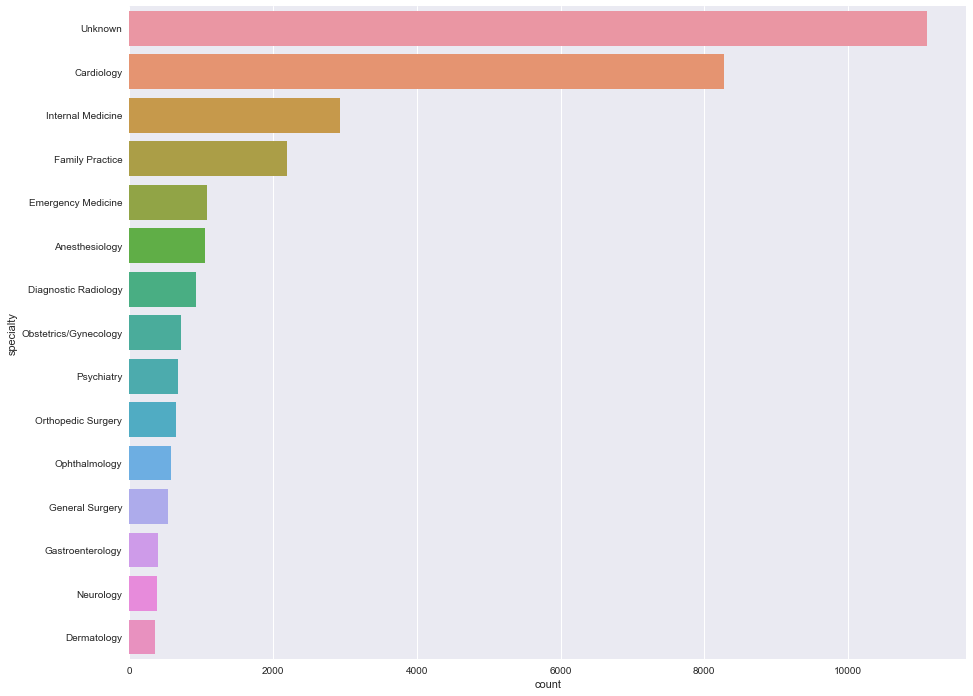

In [8]:
plt.figure(figsize=(15,12))
sns.countplot(y = phy.specialty,order=phy['specialty'].value_counts().head(15).index)
#plt.xticks(rotation=90)

In [4]:
phy['Cardiologist'] = pd.get_dummies(phy.specialty)['Cardiology']

In [5]:
phy.columns = ['physician_id','specialty','Cardiologist']

In [6]:
merged = pd.merge(proc, phy, left_on='physician_id',right_on='physician_id',how='outer')

In [12]:
merged.head()

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,General Surgery,0
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,General Surgery,0
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,General Surgery,0
3,0,99212,established_patient_office_or_other_outpatient...,27,General Surgery,0
4,0,99213,established_patient_office_or_other_outpatient...,16,General Surgery,0


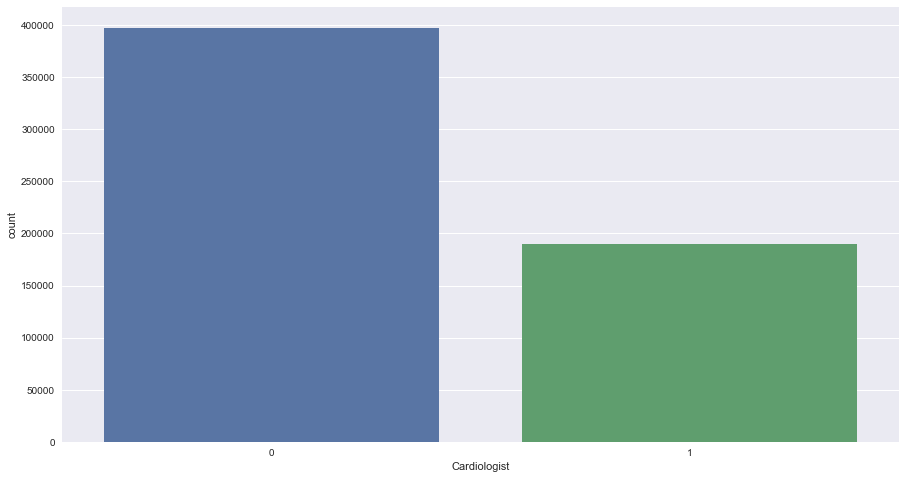

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(merged['Cardiologist'])

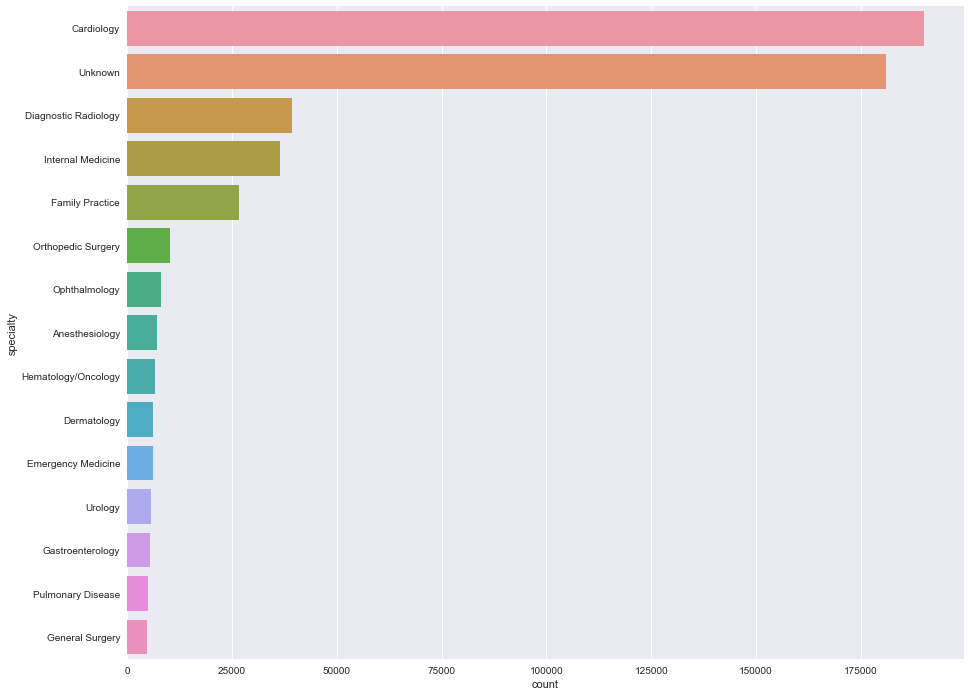

In [14]:
plt.figure(figsize=(15,12))
sns.countplot(y=merged['specialty'],order=merged['specialty'].value_counts().head(15).index)

In [28]:
merged.procedure[0]

'new_patient_office_or_other_outpatient_visit,_typically_20_minutes'

In [23]:
#Everything has underscores! Thats bad news. Time to clean it up.

In [35]:
procedure_words=[]
for line in merged.procedure:
    procedure_words.append(line.replace('_', ' '))

In [36]:
len(procedure_words)

587774

In [38]:
procedure_words[-1]

'annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit'

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfidf = TfidfVectorizer(stop_words='english')

In [42]:
bow = tfidf.fit_transform(procedure_words)

In [43]:
tfidf.get_feature_names()

['000',
 '01',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '120',
 '123',
 '125',
 '13',
 '131',
 '133',
 '14',
 '15',
 '150',
 '16',
 '18',
 '19',
 '199',
 '1mg',
 '20',
 '200',
 '201',
 '21',
 '24',
 '25',
 '250',
 '28',
 '299',
 '30',
 '300',
 '31',
 '349',
 '35',
 '350',
 '354',
 '399',
 '3d',
 '3mg',
 '40',
 '41',
 '45',
 '48',
 '50',
 '500',
 '55',
 '5mg',
 '60',
 '70',
 '72',
 '74',
 '75',
 '750',
 '80',
 '82',
 '90',
 '999',
 '99m',
 'a1c',
 'a9270',
 'aaa',
 'abatacept',
 'abdomen',
 'abdominal',
 'abnormal',
 'abscess',
 'absorptiometry',
 'abuse',
 'accelerator',
 'access',
 'accessed',
 'accessing',
 'accessory',
 'accumulation',
 'acellular',
 'acetaminophen',
 'acetate',
 'acetonide',
 'achilles',
 'acid',
 'acids',
 'acne',
 'acth',
 'activated',
 'activities',
 'activity',
 'acute',
 'adaptation',
 'add',
 'addition',
 'additional',
 'adenosine',
 'adenovirus',
 'adhesion',
 'adhesive',
 'adjustable',
 'adjustment',
 'administered',
 'administration',
 'adrenalin',
 'adrenoc

In [44]:
bow

<587774x2328 sparse matrix of type '<class 'numpy.float64'>'
	with 4469836 stored elements in Compressed Sparse Row format>

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
nb = MultinomialNB()

In [50]:
y = merged.Cardiologist

In [53]:
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.33, random_state=42)

In [54]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
preds = nb.predict(X_test)

In [57]:
metrics.accuracy_score(y_test,preds)

0.75419403400595986

In [58]:
metrics.precision_score(y_test,preds)

0.64415555390002233

In [59]:
metrics.recall_score(y_test,preds)

0.5476107539820767

In [60]:
metrics.confusion_matrix(y_test,preds)

array([[111702,  19106],
       [ 28572,  34586]])

In [104]:
indices_of_cards = merged[merged.Cardiologist==1].index

In [119]:
proc_words_for_cards = []

In [120]:
for lul in indices_of_cards:
    for k in bow[lul,:].todense().tolist():
        val= k
        rowwords = []
        indices = []
        weights = []
        for i,values in enumerate(k):
            if values!=0:
                #print(tfidf.get_feature_names()[i],values)
                rowwords.append(tfidf.get_feature_names()[i])
                indices.append(i)
                weights.append(values)
        #print('Top words of the Doc are: \n')
        for i in np.argsort(weights)[-3:][::-1]:
            #print(rowwords[i])
            proc_words_for_cards.append(rowwords[i])
    #print('\n')

In [122]:
proc_words_for_cards[:10]

['pelvic',
 'abdominal',
 'artery',
 'aorta',
 'radiological',
 'abdominal',
 'radiological',
 'arteries',
 'arms',
 'rest']

In [123]:
len(proc_words_for_cards)

569780

In [124]:
import pickle

pickle_out = open("procedure_words_for_cardiologists.pickle","wb")
pickle.dump(proc_words_for_cards, pickle_out)
pickle_out.close()

In [125]:
seri = pd.Series(proc_words_for_cards)

In [126]:
len(seri)

569780

In [142]:
seri.value_counts().head(25)

office               34234
established          23827
inpatient            23554
25                   15499
subsequent           13495
color                13254
induced              13016
routine              12292
leads                12193
stress               12089
initial              10796
new                  10420
depicted             10383
direction            10383
15                    9649
supervision           7175
adjustment            6951
12                    6207
tracing               6148
electrocardiogram     6085
30                    6071
70                    6006
grafts                5891
45                    5847
heart                 5815
dtype: int64

In [130]:
indices_of_unknown = merged[merged.specialty=='Unknown'].index

In [132]:
proc_words_for_unknown = []

In [133]:
for lul in indices_of_unknown:
    for k in bow[lul,:].todense().tolist():
        val= k
        rowwords = []
        indices = []
        weights = []
        for i,values in enumerate(k):
            if values!=0:
                #print(tfidf.get_feature_names()[i],values)
                rowwords.append(tfidf.get_feature_names()[i])
                indices.append(i)
                weights.append(values)
        #print('Top words of the Doc are: \n')
        for i in np.argsort(weights)[-3:][::-1]:
            #print(rowwords[i])
            proc_words_for_unknown.append(rowwords[i])
    #print('\n')

In [134]:
pickle_out = open("procedure_words_for_unknown.pickle","wb")
pickle.dump(proc_words_for_unknown, pickle_out)
pickle_out.close()

In [135]:
un = pd.Series(proc_words_for_unknown)

In [136]:
len(un)

540656

In [140]:
un.value_counts().head(25)

office         31372
established    21951
inpatient      17780
25             12878
subsequent     10601
15              9854
new             9528
initial         8044
routine         6748
leads           6671
30              6284
color           6084
views           5923
induced         5920
stress          5472
direction       4765
depicted        4765
45              4689
70              4435
50              3693
35              3681
12              3568
ray             3436
discharge       3418
40              3378
dtype: int64

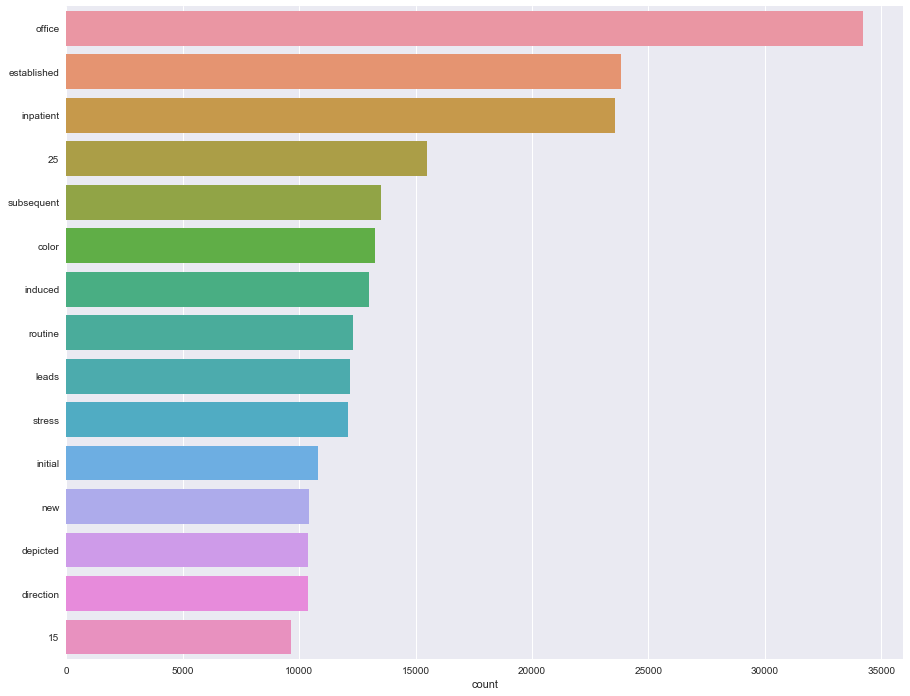

In [145]:
plt.figure(figsize=(15,12))
sns.countplot(y=un,order=un.value_counts().head(15).index)


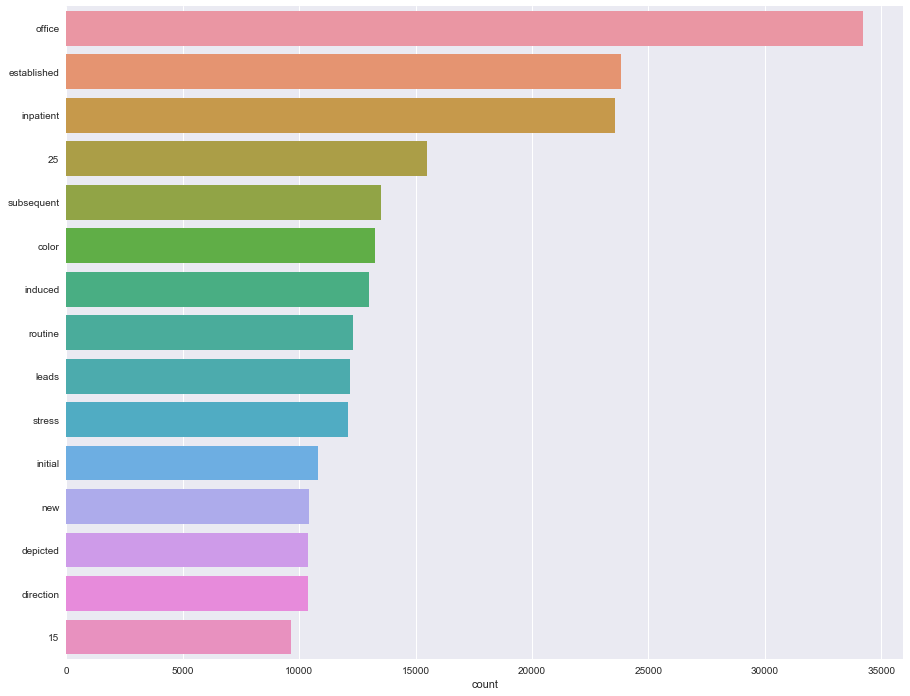

In [147]:
plt.figure(figsize=(15,12))
sns.countplot(y=seri,order=seri.value_counts().head(15).index)

In [148]:
import wordcloud

In [157]:
joined_card= ' '.join(proc_words_for_cards)
joined_un= ' '.join(proc_words_for_unknown)

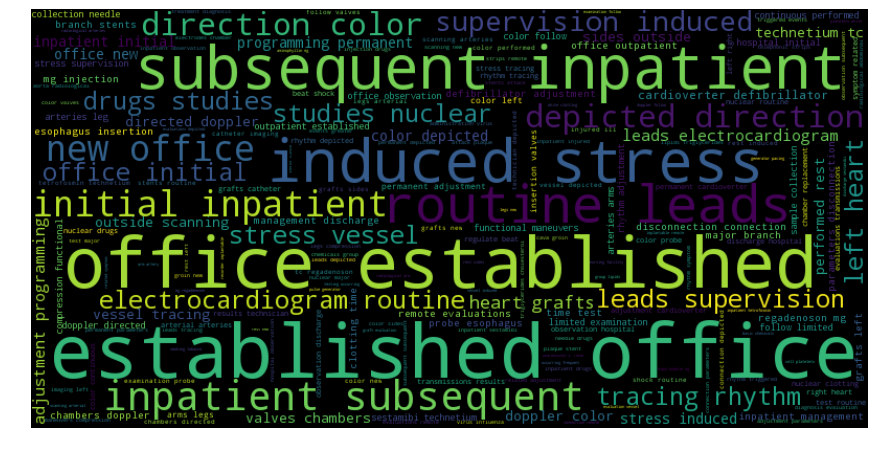

In [174]:
from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in word_string

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400).generate(joined_card)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

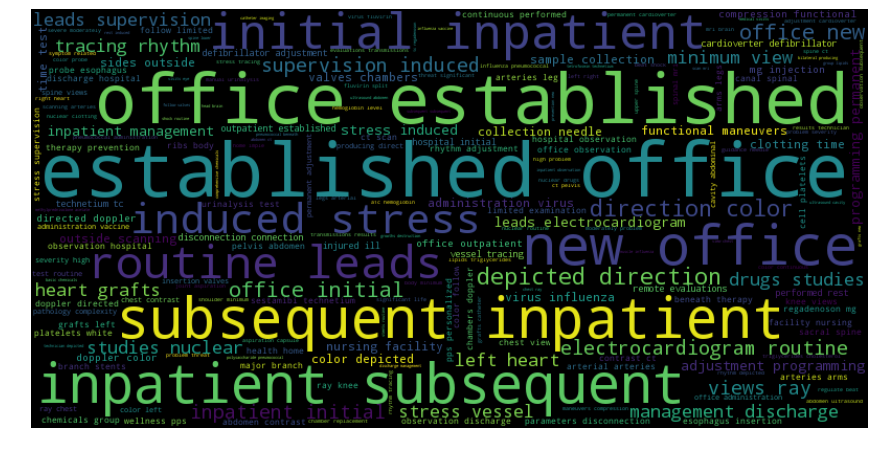

In [175]:
wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400).generate(joined_un)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
indices=[]
for i,proc in enumerate(merged.procedure):
    w=[]
    w.append(proc.replace('_', ' '))
    if 'typically' in w[0].split():
        indices.append(i)

In [8]:
merged_not_typically = merged.drop(merged.index[list(indices)])
merged_not_typically = merged_not_typically.reset_index()
merged_not_typically.drop('index',axis=1,inplace=True)

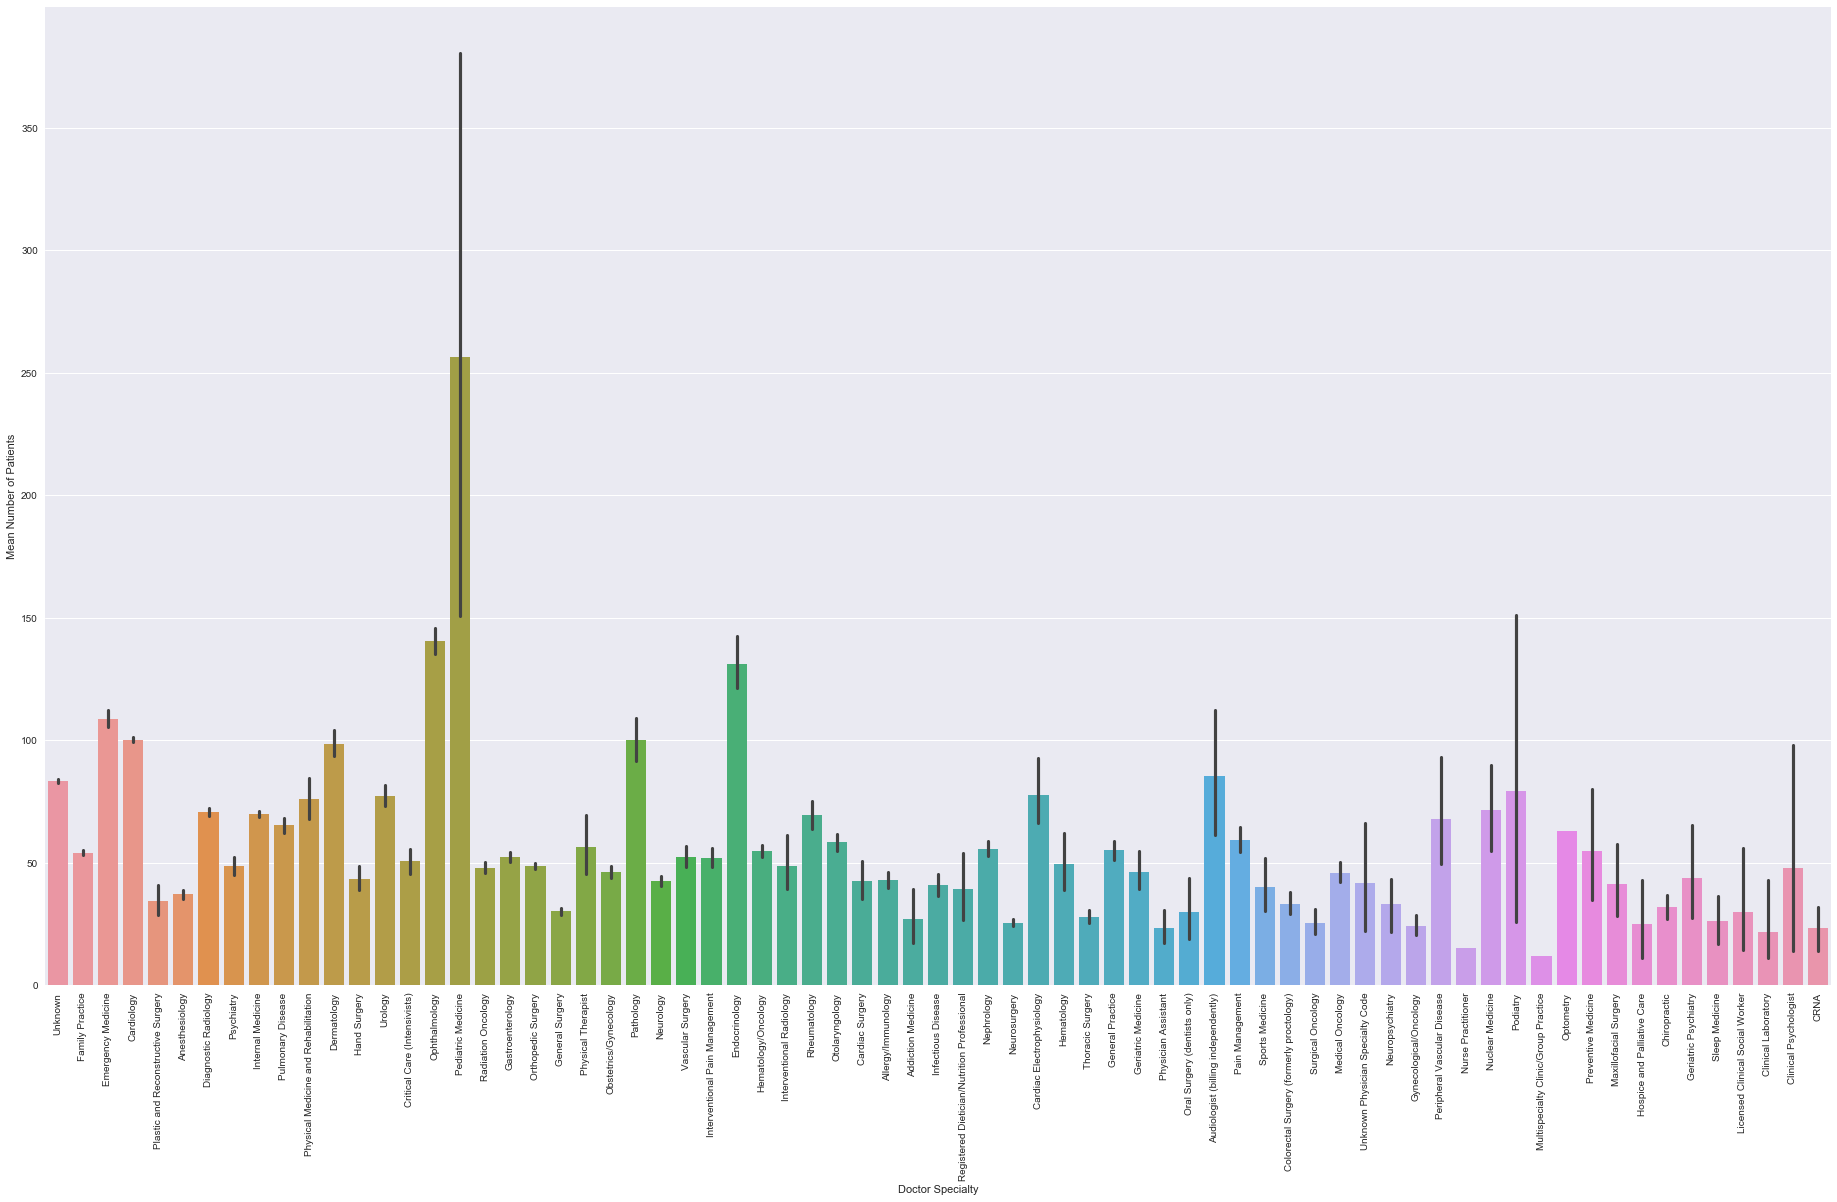

In [19]:
plt.figure(figsize=(32,18))
bar = sns.barplot(x=merged_not_typically.specialty, y=merged_not_typically.number_of_patients).get_figure()
plt.xticks(rotation=90)
plt.xlabel('Doctor Specialty')
plt.ylabel('Mean Number of Patients')
bar.savefig('num_of_patients_distribution.png')


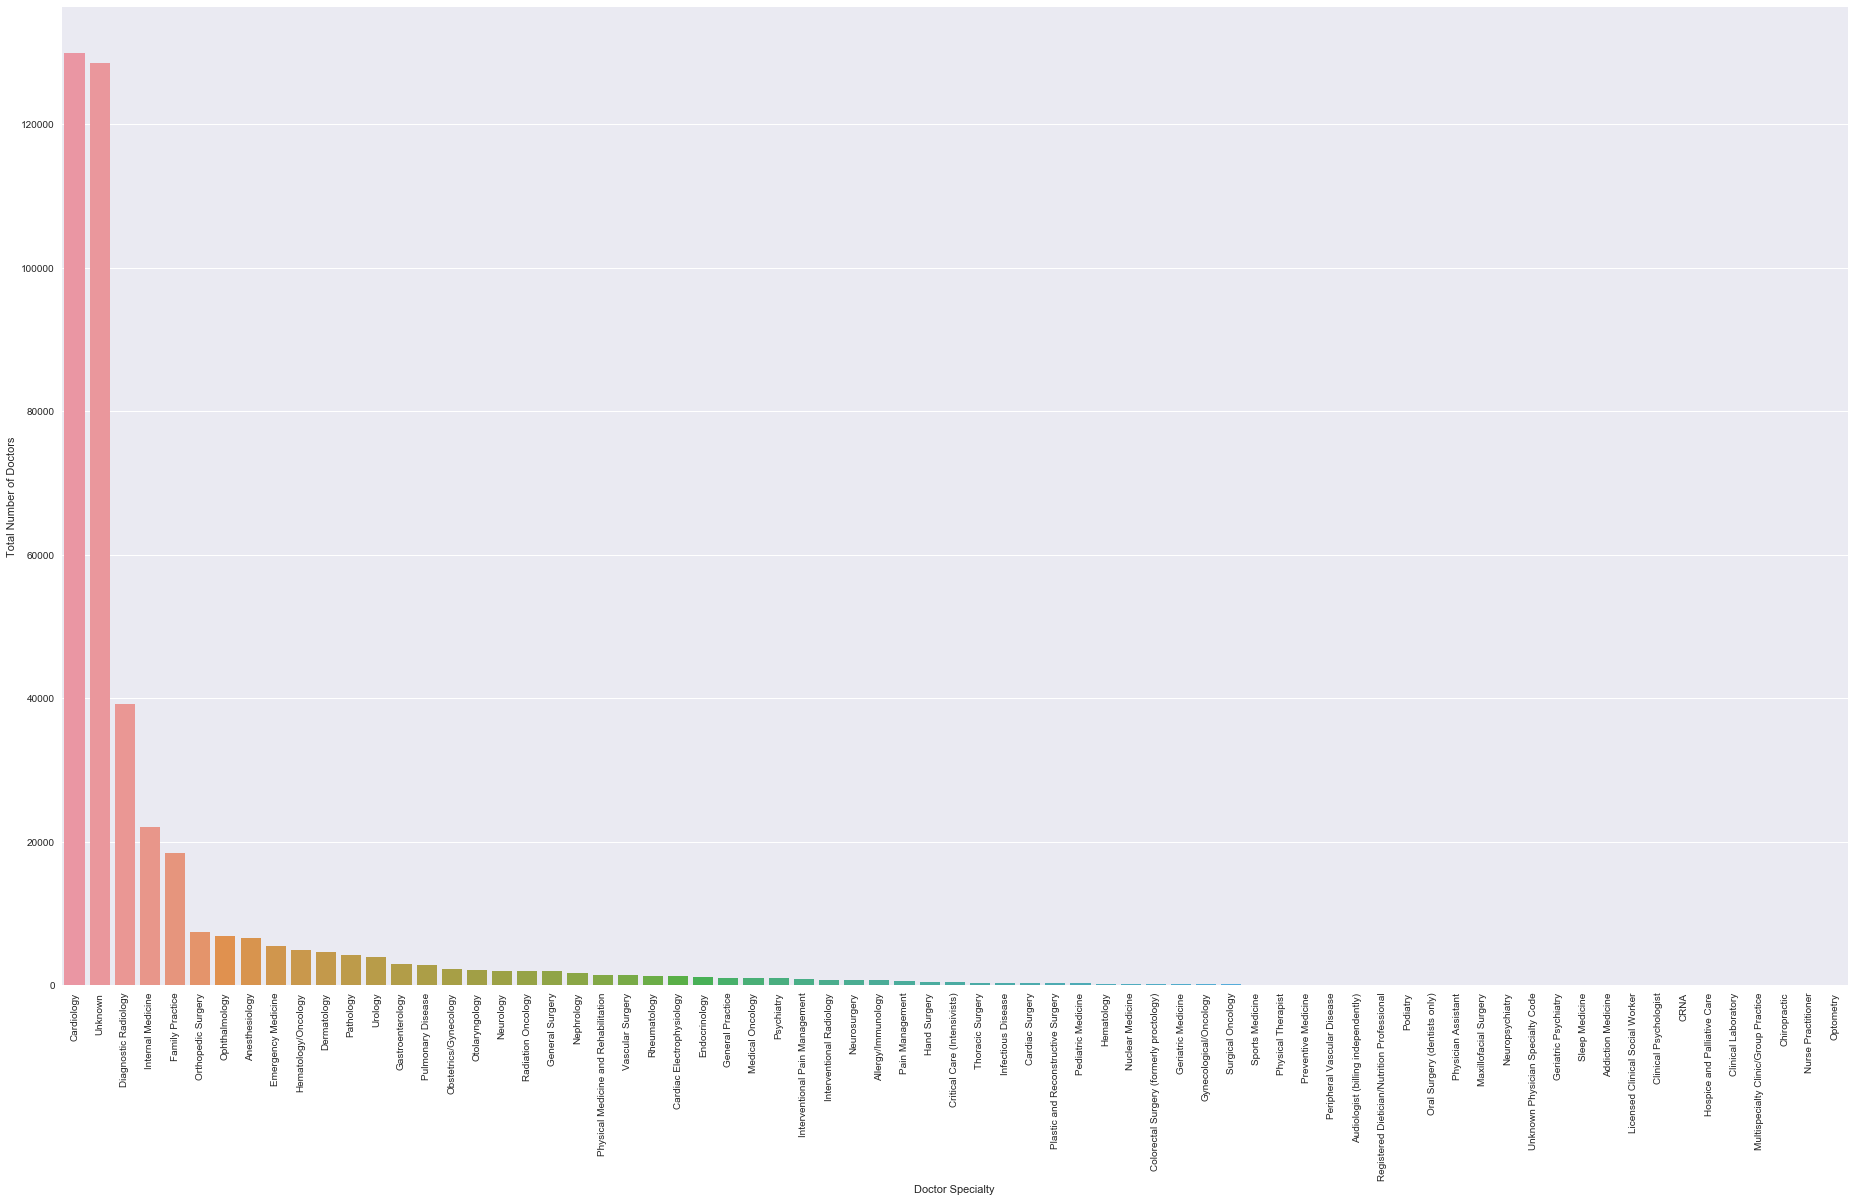

In [20]:
plt.figure(figsize=(32,18))
sns_plot = sns.countplot(merged_not_typically.specialty,order=merged_not_typically.specialty.value_counts().index).get_figure()
plt.xticks(rotation=90)
plt.xlabel('Doctor Specialty')
plt.ylabel('Total Number of Doctors')
sns_plot.savefig('specialty_distribution.png')
